<a href="https://colab.research.google.com/github/tardigrade99/submission_ML_pemula/blob/main/Submission_NLP_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Fiko Aditama

Email : fikoaditama114@gmail.com

In [ ]:
!pip install -q kaggle
!pip install -q plot_keras_history

from google.colab import files
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from plot_keras_history import plot_history

import os,re
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# upload json kaggle
files.upload()

!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d lokkagle/movie-genre-data -p /content/movie-genre-data/ --unzip
os.listdir('/content/movie-genre-data/')

 53% 5.00M/9.46M [00:00<00:00, 51.8MB/s]
100% 9.46M/9.46M [00:00<00:00, 60.4MB/s]


['kaggle_movie_train.csv']

In [ ]:
df = pd.read_csv('/content/movie-genre-data/kaggle_movie_train.csv')
print(f"DF Shape : {df.shape} \
      \n\nDF Columns :  {df.columns}" )

DF Shape : (22579, 3)       

DF Columns :  Index(['id', 'text', 'genre'], dtype='object')


In [ ]:
df = df[['genre','text']]
df.head()

,genre,text
0,thriller,"eady dead, maybe even wishing he was. INT. 2ND..."
1,comedy,"t, summa cum laude and all. And I'm about to l..."
2,drama,"up Come, I have a surprise.... She takes him ..."
3,thriller,ded by the two detectives. INT. JEFF'S APARTME...
4,drama,"nd dismounts, just as the other children reach..."


In [ ]:
df.genre.value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [ ]:
#df = df[df['genre'].isin(['drama','action','comedy','thriller'])]
#df.shape

In [ ]:
df.isnull().any()

genre    False
text     False
dtype: bool

In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub("[^\w\s^]"," ",x.lower()))

In [ ]:
category = pd.get_dummies(df['genre'])
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='genre')
df_new.head(2)

,text,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,eady dead maybe even wishing he was int 2nd...,0,0,0,0,0,0,0,0,1
1,t summa cum laude and all and i m about to l...,0,0,1,0,0,0,0,0,0


In [ ]:
df_new.columns

Index(['text', 'action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller'],
      dtype='object')

In [ ]:
text = df_new['text'].values
label = df_new[['action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller']].values

In [ ]:
text

array(['eady dead  maybe even wishing he was  int  2nd floor hallway three night the orderly leads liza to a door  orderly in here  white guy in his 30s  he opens the door and they step into    room three there s a white guy in his mid 30s  he looks up  wild  straight jacketed  not jerry  liza s reached the end of her rope  she just shakes her head  int  decrepit hospital room night balled up  fetal  not really all there  head pressed to the cement  he tries to sing to himself  jerry blue moon    blue moon    int  2nd floor hallway three night liza just stands there  leaning on a rail on the wall  the orderly isn t sure what s going on  but he knows it s bad  orderly you okay  liza starts down the hall with the orderly following  orderly we got some new patients last week  you want to see them  liza waves them off  it s hopeless  she stops at a chicken wired window at the end of the hall  looks out  light s about to break and jerry s out there somewhere  orderly look  i gotta get back 

In [ ]:
label

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# Lalu, bagi data untuk training dan data untuk testing.
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(text, label, test_size=0.2,shuffle=True)

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

In [ ]:
print(tokenizer.word_index)

{'x': 1464, 'the': 2, 'a': 3, 'to': 4, 'and': 5, 's': 6, 'of': 7, 'you': 8, 'i': 9, 'in': 10, 'it': 11, 'he': 12, 'is': 13, 'his': 14, 'on': 15, 't': 16, 'her': 17, 'at': 18, 'that': 19, 'with': 20, 'as': 21, 'she': 22, 'up': 23, 'we': 24, 'out': 25, 'for': 26, 'him': 27, 'what': 28, 'they': 29, 'from': 30, 'this': 31, 'are': 32, 'int': 33, 'me': 34, 'into': 35, 'but': 36, 'back': 37, 'down': 38, 'have': 39, 'all': 40, 'can': 41, 'be': 42, 're': 43, 'there': 44, 'm': 45, 'one': 46, 'not': 47, 'don': 48, 'no': 49, 'then': 50, 'my': 51, 'do': 52, 'your': 53, 'an': 54, 'over': 55, 'like': 56, 'looks': 57, 'just': 58, 'day': 59, 'was': 60, 'night': 61, 'know': 62, 'by': 63, 'off': 64, 'ext': 65, 'them': 66, 'now': 67, 'door': 68, 'get': 69, 'room': 70, 'see': 71, 'about': 72, 'man': 73, 'here': 74, 'so': 75, 'll': 76, 'if': 77, 'through': 78, 'd': 79, 'who': 80, 'around': 81, 'has': 82, 'right': 83, 'go': 84, 'two': 85, 'look': 86, 'their': 87, 'o': 88, 'got': 89, 'turns': 90, 'away': 91, 

In [ ]:
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test) 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=16))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               74240     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
Total params: 158,665
Trainable params: 158,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90  and logs.get('val_accuracy')>0.90):
      print("\nAkurasi dan Validation Akurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit()
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test),
                    verbose=2,validation_steps=64,
                    callbacks=[callbacks])

Epoch 1/30
565/565 - 151s - loss: 1.5737 - accuracy: 0.3741 - val_loss: 1.4583 - val_accuracy: 0.3948
Epoch 2/30
565/565 - 148s - loss: 1.3059 - accuracy: 0.4321 - val_loss: 1.1970 - val_accuracy: 0.4586
Epoch 3/30
565/565 - 149s - loss: 1.1363 - accuracy: 0.4928 - val_loss: 1.1283 - val_accuracy: 0.4920
Epoch 4/30
565/565 - 148s - loss: 0.9459 - accuracy: 0.6173 - val_loss: 0.9609 - val_accuracy: 0.6422
Epoch 5/30
565/565 - 148s - loss: 0.7720 - accuracy: 0.7397 - val_loss: 0.8082 - val_accuracy: 0.7374
Epoch 6/30
565/565 - 148s - loss: 0.5887 - accuracy: 0.8053 - val_loss: 0.7150 - val_accuracy: 0.7633
Epoch 7/30
565/565 - 148s - loss: 0.5345 - accuracy: 0.8323 - val_loss: 0.7428 - val_accuracy: 0.7890
Epoch 8/30
565/565 - 148s - loss: 0.5058 - accuracy: 0.8399 - val_loss: 1.4220 - val_accuracy: 0.7053
Epoch 9/30
565/565 - 147s - loss: 0.5279 - accuracy: 0.8289 - val_loss: 0.6476 - val_accuracy: 0.8067
Epoch 10/30
565/565 - 146s - loss: 0.4086 - accuracy: 0.8707 - val_loss: 0.6066 - 

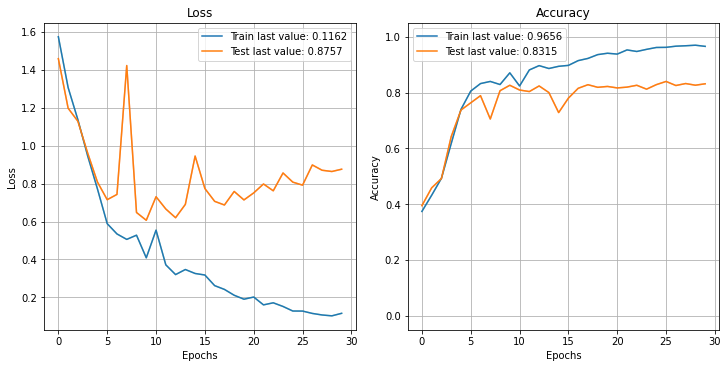

In [ ]:
plot_history(history)
plt.show()